<a href="https://colab.research.google.com/github/ifolo-nwulu/DS-Assignment-Submission-Practice-Repository/blob/master/BuildWeekProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, validation_curve

In [2]:
import pandas as pd

# Read and store content of an excel file as csv
read_file = pd.read_excel ("Best US Cities.xlsx")
read_file.to_csv ("Best US Cities.xlsx.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert into a dataframe object
df = pd.DataFrame(pd.read_csv("Best US Cities.xlsx.csv"))
  
  

In [3]:
# changed the column names to add underscores so that there were no problematic spaces in the column names
df.columns = ['US_News_Rank', 'City', 'State', 'Metro_Population',
        'Average_Annual_Salary', 'Avg High/Low Temps', 'Median_Age',
        'Median_Home_Price', 'AVG_Annual_Rainfall', 'Unemployment_Rate',
        'Median_Monthly_Rent', 'Avg_Commute_Time', 'Percent_Single',
        'Total_Students', 'Total_Teachers', 'Violent_Crime', 'Property_Crime', 'Link']


#removed the word inches and minutes in the 2 columns
df["AVG_Annual_Rainfall"] = df["AVG_Annual_Rainfall"].str.replace("inches","") 
df["Avg_Commute_Time"] = df["Avg_Commute_Time"].str.replace("minutes", "")

#dropped 3 columns I wasn't personally interested in 
df.drop(['Total_Students', 'Total_Teachers', 'Link'], axis=1, inplace = True)

#added an underscore infront of the column name State and then added it to the City column to form a City_State column and dropped the previous 2 columns
df["STATE"] = df['State'].str.rjust(4,"_")
df['City_State'] = df['City'] + df['STATE']
df.drop(["STATE", "State", "City"], axis = 1, inplace = True)

#I divided the High and Low Temps into 2 separate columns and dropped the original column
df["Avg_High_Temp"] = df["Avg High/Low Temps"].str[:4]
df["Avg_Low_Temp"] = df["Avg High/Low Temps"].str[-5:-1]
df.drop(["Avg High/Low Temps"], axis = 1, inplace = True)


In [4]:
#looked up missing info that could be found on google and replaced many missing values, all except 2.  more elegant way to do this?
df.loc[10, "Avg_High_Temp"] = 73
df.loc[15, "Avg_High_Temp"] = 67
df.loc[28, "Avg_High_Temp"] = 69.8
df.loc[32, "Avg_High_Temp"] = 67
df.loc[36, "Avg_High_Temp"] = 77
df.loc[39, "Avg_High_Temp"] = 60
df.loc[40, "Avg_High_Temp"] = 57
df.loc[42, "Avg_High_Temp"] = 58
df.loc[69, "Avg_High_Temp"] = 44
df.loc[72, "Avg_High_Temp"] = 70
#df.loc[74, "Avg_High_Temp"] = ""
df.loc[76, "Avg_High_Temp"] = 64
#df.loc[77, "Avg_High_Temp"] = ""
df.loc[79, "Avg_High_Temp"] = 67
df.loc[83, "Avg_High_Temp"] = 62
df.loc[86, "Avg_High_Temp"] = 64
df.loc[95, "Avg_High_Temp"] = 79
df.loc[100, "Avg_High_Temp"] = 78
df.loc[104, "Avg_High_Temp"] = 82
df.loc[107, "Avg_High_Temp"] = 78
df.loc[114, "Avg_High_Temp"] = 57
df.loc[115, "Avg_High_Temp"] = 84
df.loc[116, "Avg_High_Temp"] = 68
df.loc[120, "Avg_High_Temp"] = 77
df.loc[121, "Avg_High_Temp"] = 77

df.loc[10, "Avg_Low_Temp"] = 51
df.loc[15, "Avg_Low_Temp"] = 46
df.loc[28, "Avg_Low_Temp"] = 49.2
df.loc[32, "Avg_Low_Temp"] = 40
df.loc[36, "Avg_Low_Temp"] = 59
df.loc[39, "Avg_Low_Temp"] = 41
df.loc[40, "Avg_Low_Temp"] = 39
df.loc[42, "Avg_Low_Temp"] = 38
df.loc[69, "Avg_Low_Temp"] = 30
df.loc[72, "Avg_Low_Temp"] = 53
df.loc[74, "Avg_Low_Temp"] = 55
df.loc[76, "Avg_Low_Temp"] = 42
df.loc[77, "Avg_Low_Temp"] = 55
df.loc[79, "Avg_Low_Temp"] = 45
df.loc[83, "Avg_Low_Temp"] = 43
df.loc[86, "Avg_Low_Temp"] = 42
df.loc[95, "Avg_Low_Temp"] = 60
df.loc[100, "Avg_Low_Temp"] = 54
df.loc[104, "Avg_Low_Temp"] = 63
df.loc[107, "Avg_Low_Temp"] = 59
df.loc[114, "Avg_Low_Temp"] = 38
df.loc[115, "Avg_Low_Temp"] = 65
df.loc[116, "Avg_Low_Temp"] = 47
df.loc[120, "Avg_Low_Temp"] = 57
df.loc[121, "Avg_Low_Temp"] = 55

df.loc[10, "AVG_Annual_Rainfall"] = 55
df.loc[15, "AVG_Annual_Rainfall"] = 43.7
df.loc[28, "AVG_Annual_Rainfall"] = 46.2
df.loc[32, "AVG_Annual_Rainfall"] = 8.9
df.loc[36, "AVG_Annual_Rainfall"] = 64.4
df.loc[39, "AVG_Annual_Rainfall"] = 38.1
df.loc[40, "AVG_Annual_Rainfall"] = 44
df.loc[42, "AVG_Annual_Rainfall"] = 33
df.loc[68, "AVG_Annual_Rainfall"] = 40.4
df.loc[69, "AVG_Annual_Rainfall"] = 16.6
df.loc[72, "AVG_Annual_Rainfall"] = 18.5
df.loc[74, "AVG_Annual_Rainfall"] = 51.9
df.loc[76, "AVG_Annual_Rainfall"] = 44.9
df.loc[77, "AVG_Annual_Rainfall"] = 58.3
df.loc[79, "AVG_Annual_Rainfall"] = 45.1
df.loc[83, "AVG_Annual_Rainfall"] = 45
df.loc[86, "AVG_Annual_Rainfall"] = 41.9
df.loc[95, "AVG_Annual_Rainfall"] = 61
df.loc[100, "AVG_Annual_Rainfall"] = 32.8
df.loc[104, "AVG_Annual_Rainfall"] = 33
df.loc[107, "AVG_Annual_Rainfall"] = 65
df.loc[114, "AVG_Annual_Rainfall"] = 32
df.loc[115, "AVG_Annual_Rainfall"] = 25.6
df.loc[116, "AVG_Annual_Rainfall"] = 15.3
df.loc[120, "AVG_Annual_Rainfall"] = 66.4
df.loc[121, "AVG_Annual_Rainfall"] = 51.3

df.loc[28, "Median_Home_Price"] = 240302
df.loc[79, "Median_Home_Price"] = 175958
df.loc[104, "Median_Home_Price"] = 189464
df.loc[107, "Median_Home_Price"] = 119200
df.loc[110, "Median_Home_Price"] = 66445
df.loc[111, "Median_Home_Price"] = 167486
df.loc[115, "Median_Home_Price"] = 131195
df.loc[121, "Median_Home_Price"] = 120383
df.loc[124, "Median_Home_Price"] = 175000

In [5]:
#converted the 125 unique rankings into only 2 categories (my target) and then dropped the original column

df["1st_or_2nd"] = pd.Series()

df.loc[df["US_News_Rank"] < 63, "1st_or_2nd"] = 1
df.loc[df["US_News_Rank"] > 62, "1st_or_2nd"] = 2

df.drop(labels = "US_News_Rank", axis =1, inplace = True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.set_index('City_State', inplace=True) 

df["Avg_High_Temp"] = df.Avg_High_Temp.astype(float)  
df["Avg_Low_Temp"] = df.Avg_Low_Temp.astype(float) 
df["Avg_Commute_Time"] = df.Avg_Commute_Time.astype(float)
df["AVG_Annual_Rainfall"] = df.AVG_Annual_Rainfall.astype(float)

df["Avg_High_Temp"].fillna((df["Avg_High_Temp"].median()), inplace=True)



In [7]:
#df.info() final dataframe has 14 columns, 3 ints, 11 floats, no missing values, no imputer needed, no encoder needed since all numeric columns, 
#df_1 =  df.iloc[0:62,:]
#df_2 = df.iloc[62:126,:]

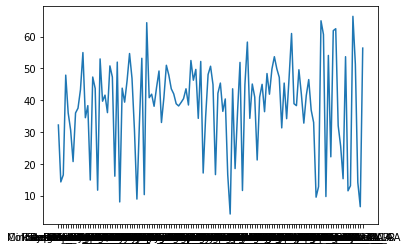

In [8]:
plt.plot(df['AVG_Annual_Rainfall']);
#sns.distplot(df['AVG_Annual_Rainfall'],kde=True,bins=100);
#df['Median_Home_Price'].describe()

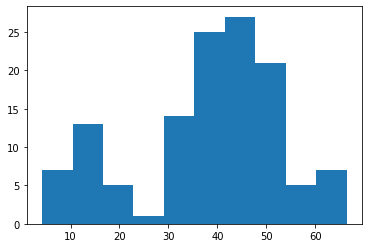

In [9]:
plt.hist(df["AVG_Annual_Rainfall"]); 

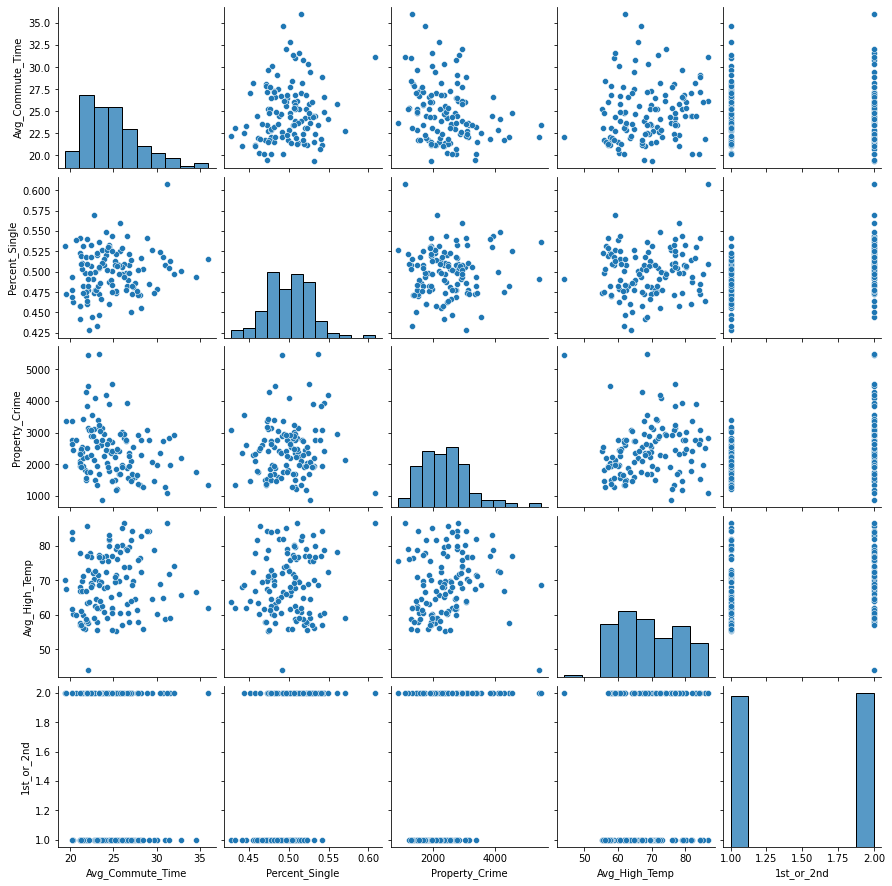

In [10]:
import seaborn as sns
sns.pairplot(df[['Avg_Commute_Time','Percent_Single','Property_Crime','Avg_High_Temp','1st_or_2nd']])


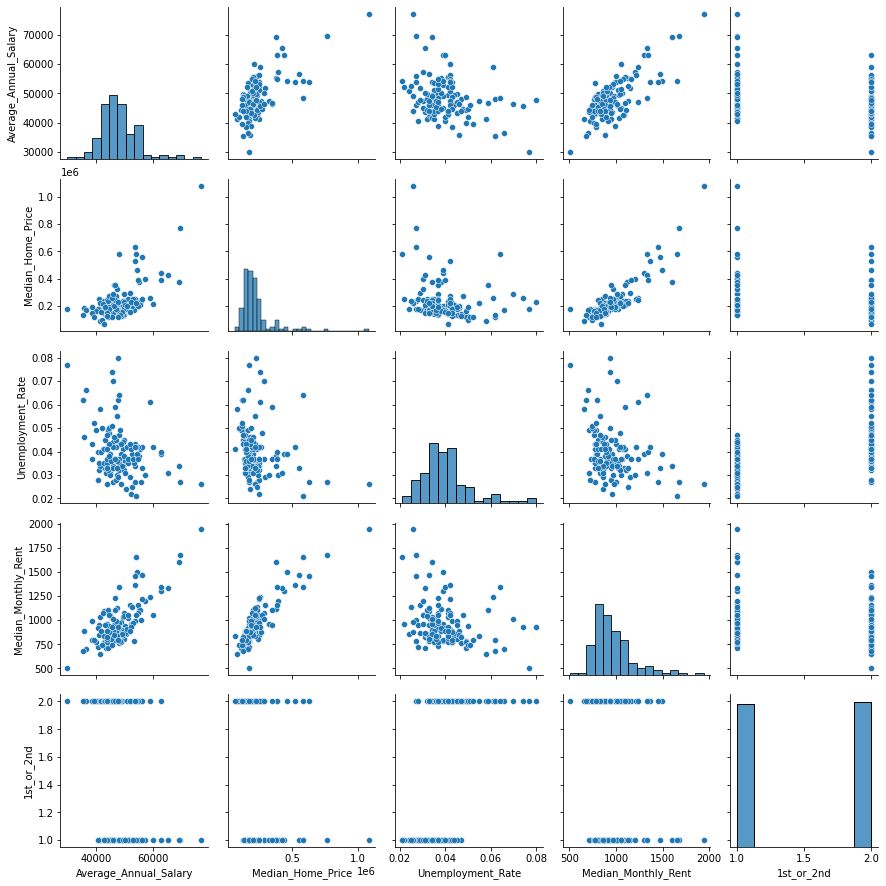

In [11]:
sns.pairplot(df[['Average_Annual_Salary','Median_Home_Price','Unemployment_Rate','Median_Monthly_Rent','1st_or_2nd']])

In [ ]:
sns.pairplot(df[['Median_Age','Avg_Low_Temp','Metro_Population','Violent_Crime','AVG_Annual_Rainfall','1st_or_2nd']])


In [ ]:
target = "1st_or_2nd"
features = df.columns.drop([target]) 
X = df[features]
y = df[target]

In [ ]:
baseline = .504

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.90, random_state=80)


In [ ]:
model_Lr = make_pipeline(StandardScaler(), LogisticRegression()) 
model_Lr.fit(X_train, y_train);   

print(model_Lr.score(X_train, y_train))
print(model_Lr.score(X_test, y_test))
print(model_Lr.predict(X_test))

In [ ]:
coefficients = model_Lr.named_steps['logisticregression'].coef_
coefficients

In [ ]:
coefficients = model_Lr.named_steps['logisticregression'].coef_.flatten().tolist()  
features = X.columns
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)                      
feat_imp.head(20).plot(kind='barh') 

In [ ]:
plot_confusion_matrix(model_Lr, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [ ]:
model_dt = make_pipeline(DecisionTreeClassifier(max_depth = 4, random_state = 42)) 
model_dt.fit(X_train, y_train);
print(model_dt.score(X_train, y_train))
print(model_dt.score(X_test, y_test)) 
print(model_dt.predict(X_test))


In [ ]:
features = X.columns
gini = model_dt.named_steps['decisiontreeclassifier'].feature_importances_
pd.Series(data=gini, index=features).sort_values(key=abs).tail(15).plot(kind='barh')
plt.ylabel('features')
plt.xlabel('gini importance')

In [ ]:
model_rf = make_pipeline(RandomForestClassifier(random_state = 42)) 
model_rf.fit(X_train, y_train);
print(model_rf.score(X_train, y_train))
print(model_rf.score(X_test, y_test)) 


In [ ]:
Features = X.columns
Gini = model_rf.named_steps['randomforestclassifier'].feature_importances_
pd.Series(data=Gini, index=Features).sort_values(key=abs).tail(13).plot(kind='barh')
plt.ylabel('features')
plt.xlabel('gini importance')

In [ ]:
model_gb = make_pipeline(GradientBoostingClassifier(random_state = 42)) 
model_gb.fit(X_train, y_train);
print(model_gb.score(X_train, y_train))
print(model_gb.score(X_test, y_test)) 

In [ ]:
model_xgb = make_pipeline(XGBClassifier(random_state = 42)) 
model_xgb.fit(X_train, y_train);
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test)) 


In [ ]:
Gini = model_xgb.named_steps['xgbclassifier'].feature_importances_
pd.Series(data=Gini, index=Features).sort_values(key=abs).tail(13).plot(kind='barh')
plt.ylabel('features')
plt.xlabel('gini importance')

In [ ]:
# model_lr = make_pipeline(StandardScaler(), LinearRegression())
# model_lr.fit(X_train, y_train);
# print(model_lr.score(X_train, y_train))
# print(model_lr.score(X_test, y_test))

In [ ]:
# model_r = make_pipeline(StandardScaler(), Ridge()) 
# model_r.fit(X_train, y_train);
# print(model_r.score(X_train, y_train))
# print(model_r.score(X_test, y_test))

In [ ]:
# model_RF = make_pipeline(RandomForestClassifier(random_state = 42)) 
# cv_scores_rf = cross_val_score(model_RF, X, y, cv = 5, n_jobs = -1)
# print('Average CV score for decision tree model:', cv_scores_rf.mean())

In [ ]:
# model_DT = make_pipeline(DecisionTreeClassifier(random_state = 67)) 
# cv_scores_dt = cross_val_score(model_DT, X, y, cv = 5, n_jobs = -1)
# print('Average CV score for decision tree model:', cv_scores_dt.mean())